In [14]:
import random
import matplotlib.pyplot as plt
import numpy

In [15]:
#Set birth and death rates
#Initialize data arrays
birth_rate = 1000
death_rate = 1
population = 1
rna_pop_data = []
rna_time_data = []
h_data = []
time = 0

iterations = 10000

In [16]:
for i in range(iterations):
    #Get probabilities for birth or death
    p_birth = birth_rate / ((population * death_rate) + birth_rate)
    p_death = 1 - p_birth
    
    #Sample Categorical; "where to go"; False = death, True = birth
    choice = numpy.random.choice([False, True], size=1, p=[p_death, p_birth])[0]
    
    #rate to use to sample from Exponential; depends on birth/death rates
    exp_distr_rate = (population * death_rate) + birth_rate
    
    #Sample holding time and accumulate time; "when to go"
    #for some reason in numpy they use the inverse of the rate as the parameterization, so I have to convert
    h = numpy.random.exponential(scale=(1 / exp_distr_rate), size=1)[0]
    time += h
    
    #Collect the data
    h_data.append(h)
    rna_pop_data.append(population)
    rna_time_data.append(time)
    
    #Update population
    if choice == True:
        population += 1
    else:
        population += -1

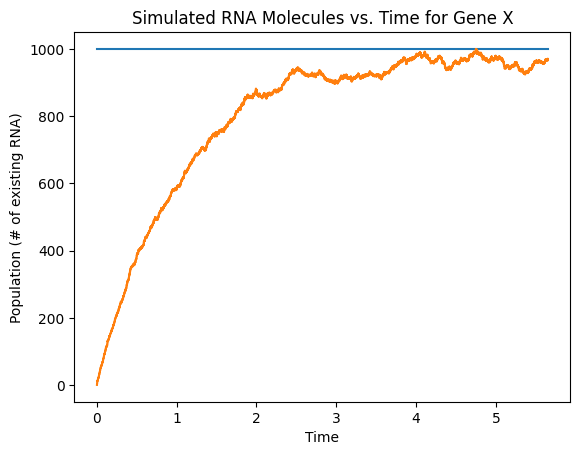

In [18]:
#SS Population from mass-action laws
steady_state = birth_rate / death_rate

#Plot SS population line
plt.plot([0, time], [steady_state, steady_state])

#Plot RNA population data
plt.step(rna_time_data, rna_pop_data)

#Labels
plt.xlabel("Time")
plt.ylabel("Population (# of existing RNA)")
title = plt.title("Simulated RNA Molecules vs. Time for Gene X")